# Persiapan dan Analisis Data

### Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [3]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [4]:
df.drop(['Class'],axis=1,inplace=True)

In [5]:
df.shape[0]

5656

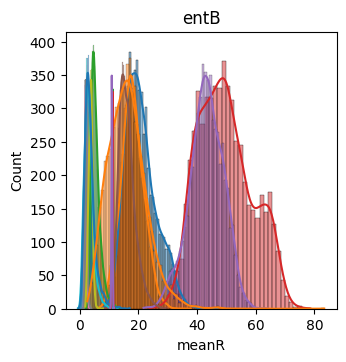

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(df, 1):
    plt.subplot(3, 5, 1)  # 3 baris dan 5 kolom
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Informasi Statistik Dasar

In [7]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,20.894382,5.260718,6.854176,46.994451,40.140274,17.015386,20.055104,23.933250
meanG,18.023509,3.885058,6.259336,37.866338,31.607002,15.462487,17.823574,20.508286
meanB,5.562521,1.572465,1.823841,14.023399,12.199558,4.469088,5.206807,6.298417
stdR,49.518673,9.091646,23.889681,78.573397,54.683716,42.518804,48.737837,55.533851
stdG,43.181128,5.799811,21.816707,63.912439,42.095732,39.565446,43.274979,47.258675
stdB,16.216090,2.737406,7.831019,29.260652,21.429632,14.261454,15.830328,17.684630
skewR,2.164332,0.298941,1.154889,3.582313,2.427425,1.962475,2.147151,2.337118
skewG,2.232326,0.340901,1.203163,3.997579,2.794416,2.003130,2.188874,2.405244
skewB,3.745612,0.647198,1.944842,7.961952,6.017110,3.304125,3.764237,4.170742
kurR,3.208423,1.533598,-0.531692,12.941081,13.472773,2.161075,3.023438,3.989808


### Missing Value

In [8]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your DataFrame containing the dataset

# # Create histograms for all features in 'df'
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
# plt.tight_layout()
# plt.show()

### Mengidentifikasi Outlier

In [10]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# To find outliers for all columns:
for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:  # Check if there are any outliers
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 65
Outliers in meanG: 50
Outliers in meanB: 211
Outliers in stdR: 3
Outliers in stdG: 41
Outliers in stdB: 143
Outliers in skewR: 109
Outliers in skewG: 170
Outliers in skewB: 34
Outliers in kurR: 170
Outliers in kurG: 288
Outliers in kurB: 87
Outliers in entR: 99
Outliers in entG: 87
Outliers in entB: 74


In [11]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# To find the number of outliers for all columns:
for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]  # Get the number of outliers
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 17
Outliers in meanG: 16
Outliers in meanB: 94
Outliers in stdR: 1
Outliers in stdG: 13
Outliers in stdB: 54
Outliers in skewR: 45
Outliers in skewG: 63
Outliers in skewB: 20
Outliers in kurR: 72
Outliers in kurG: 97
Outliers in kurB: 40
Outliers in entR: 27
Outliers in entG: 27
Outliers in entB: 23


# Preprocessing Data

### Normalisasi (min max)

In [12]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)
# df = pd.DataFrame(df_scaled, columns=df.columns)

In [13]:
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
# plt.tight_layout()
# plt.show()

# Model

In [ ]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change):
  output = []
  d = []
  closest_neighbors = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]
      d_in = {}
      w_to_update = []

      for k in range(len(w)):
        d_in[k] = np.sum(np.multiply(data, w[k]))

      d.append((j,d_in))
      d_in = dict(sorted(d_in.items(), key=lambda item: item[1]))
      closest_neighbor_index = list(d_in.keys())[0]
      closest_neighbors.append(closest_neighbor_index)
      

      for key in d_in:
        w_to_update.append(key)

      for l in range(R + 1) :
        dw = (np.multiply(lr,(np.subtract(data, w[w_to_update[l]]))))
        w[w_to_update[l]] = np.add(w[w_to_update[l]], dw)
    lr *= 0.5

    if((i+1)%R_change == 0):
      R = np.random.randint(0,cluster)

  return d, w, closest_neighbors




## Calculating Error

In [15]:
def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    # Calculate distances to all neurons
    distances = [np.linalg.norm(data - weight) for weight in w]

    # Find BMU and second BMU
    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    # Check if second BMU is adjacent to BMU in the grid
    if abs(closest_neighbors - second_closest_neighbors) > 1:  # Simplified adjacency check
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  return qe, te

# Tuning Hyperparameter

In [ ]:
size = df.shape[1]

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  R_change = np.random.randint(1, 10)
  max_epoch = np.random.randint(10, 100)

  return cluster, w, R, lr, R_change, max_epoch

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_min_error = [1e1000,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i+1}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    d, w, closest_neighbors = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change)

    qe, te = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}')

    if qe+te < best_min_error[0]:
      best_min_error[0] = qe+te
      best_min_error[1] = qe
      best_min_error[2] = te
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch]

    print(f'best parameter is tuning {best_parameter[0]+1}, with error qe : {best_min_error[1]} and te : {best_min_error[2]}\n')
  return best_parameter

best_parameter = tuning(10)

Tuning 1, cluster : 6, R : 1, lr : 0.04321463860362282, R change : 4, max epoch : 15
qe : 13.610196341618554, te : 0.5926449787835927
best parameter is tuning 1, with error qe : 13.610196341618554 and te : 0.5926449787835927

Tuning 2, cluster : 3, R : 1, lr : 0.06219364212049347, R change : 8, max epoch : 17
qe : 13.011643190289593, te : 0.003005657708628006
best parameter is tuning 2, with error qe : 13.011643190289593 and te : 0.003005657708628006

Tuning 3, cluster : 5, R : 3, lr : 0.09196615691294574, R change : 7, max epoch : 73
qe : 13.49411742588347, te : 0.45014144271570017
best parameter is tuning 2, with error qe : 13.011643190289593 and te : 0.003005657708628006

Tuning 4, cluster : 6, R : 1, lr : 0.039499127787003284, R change : 5, max epoch : 69
qe : 14.068687178739278, te : 0.9230905233380481
best parameter is tuning 2, with error qe : 13.011643190289593 and te : 0.003005657708628006

Tuning 5, cluster : 2, R : 0, lr : 0.010096416690562215, R change : 7, max epoch : 72
q

# Testing

### Testing sementara

In [17]:
best_cluster = 2
best_R = 0
best_lr = 0.0027500529639576006
r_change = 3
max_epoch = 21

In [102]:
train = df.to_numpy()

d, w, closest_neighbors = SOM(train, w=best_parameter[2], cluster=best_parameter[1], R=best_parameter[3], lr = best_parameter[4], R_change = best_parameter[5], max_epoch=best_parameter[6])
qe, te = count_error(train, w, closest_neighbors)
print(f'qe : {qe}, te : {te}')

qe : 12.94641248831148, te : 0.0


In [44]:
print(best_parameter[1])

4


In [41]:
print(w)

[[21.19850838 18.20863643  5.72192081 49.98346209 43.47884639 16.47301457
   2.1597685   2.23521845  3.68681579  3.20520009  3.64931035 15.76160209
  11.27327475 11.25956745 11.04587329]
 [21.19850838 18.20863643  5.72192081 49.98346209 43.47884639 16.47301457
   2.1597685   2.23521845  3.68681579  3.20520009  3.64931035 15.76160209
  11.27327475 11.25956745 11.04587329]
 [20.56889128 17.76866589  5.53299923 49.0392635  42.85288601 16.20205748
   2.18802341  2.26084827  3.75512359  3.33322334  3.76606014 16.31861165
  11.26180288 11.24845074 11.02697553]
 [20.56889128 17.76866589  5.53299923 49.0392635  42.85288601 16.20205748
   2.18802341  2.26084827  3.75512359  3.33322334  3.76606014 16.31861165
  11.26180288 11.24845074 11.02697553]]


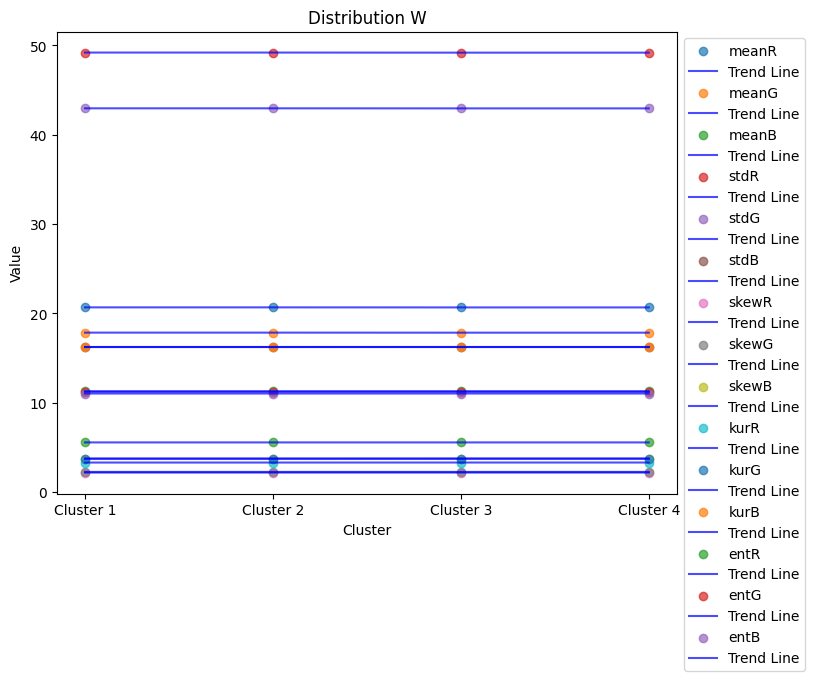

In [96]:
features = ['meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'skewR', 'skewG', 'skewB', 
            'kurR', 'kurG', 'kurB', 'entR', 'entG', 'entB']

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):
    
    # Kumpulkan semua data dari kolom k untuk setiap tuple di w
    data = [w[i][j] for i in range(len(w))]
    
    # Gabungkan data menjadi satu array
    
    # Plot data
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="Trend Line")
plt.title(f"Distribution W")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w)), [f"Cluster {i+1}" for i in range(len(w))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [108]:
for i in range(10):
    print(d[i])

(0, {0: 5526.701097532525, 1: 5526.701097532525, 2: 5525.801698994291, 3: 5525.801698994291})
(1, {0: 5466.389987829363, 1: 5466.389987829363, 2: 5465.585560779907, 3: 5465.585560779907})
(2, {0: 5753.141163385587, 1: 5753.141163385587, 2: 5752.333643805197, 3: 5752.333643805197})
(3, {0: 5838.367573542093, 1: 5838.367573542093, 2: 5837.630292459691, 3: 5837.630292459691})
(4, {0: 5444.248702685254, 1: 5444.248702685254, 2: 5443.637501910118, 3: 5443.637501910118})
(5, {0: 5441.025174946733, 1: 5441.025174946733, 2: 5440.463022648961, 3: 5440.463022648961})
(6, {0: 5233.1180212208865, 1: 5233.1180212208865, 2: 5232.621663868843, 3: 5232.621663868843})
(7, {0: 5251.769239271359, 1: 5251.769239271359, 2: 5251.322841479469, 3: 5251.322841479469})
(8, {0: 5394.6893812669705, 1: 5394.6893812669705, 2: 5394.26208865502, 3: 5394.26208865502})
(9, {0: 5688.6961255473525, 1: 5688.6961255473525, 2: 5688.288334984511, 3: 5688.288334984511})


TypeError: float() argument must be a string or a real number, not 'dict'

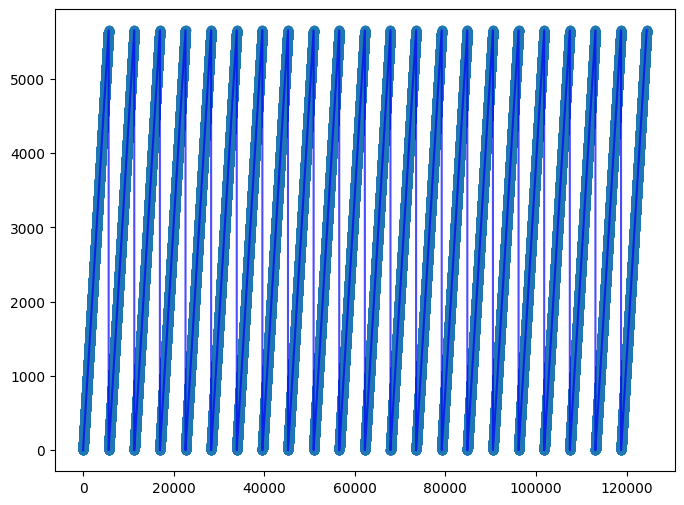

In [104]:
features = ['meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'skewR', 'skewG', 'skewB', 
            'kurR', 'kurG', 'kurB', 'entR', 'entG', 'entB']

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):
    
    # Kumpulkan semua data dari kolom k untuk setiap tuple di w
    data = [d[i][j] for i in range(len(d))]
    
    # Gabungkan data menjadi satu array
    
    # Plot data
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="Trend Line")
plt.title(f"Distribution D")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w)), [f"Cluster {i+1}" for i in range(len(w))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Testing ril

In [21]:
train = df.to_numpy()

d, w, bmu_indicies = SOM(train, w=best_parameter[2], cluster=best_parameter[1], R=best_parameter[3], lr = best_parameter[4], R_change = best_parameter[5], max_epoch=best_parameter[6])
qe, te = count_error(train, w, bmu_indicies)
print(f'qe : {qe}, te : {te}')

ValueError: too many values to unpack (expected 3)

# Analysis

placeholder

In [ ]:
from sklearn.metrics import silhouette_score

original_score = silhouette_score(train, labels)  # labels could be the closest SOM node
som_score = silhouette_score(w, labels)

print(f"Silhouette Score (Original Data): {original_score}")
print(f"Silhouette Score (SOM): {som_score}")


IndexError: index 3 is out of bounds for axis 0 with size 3

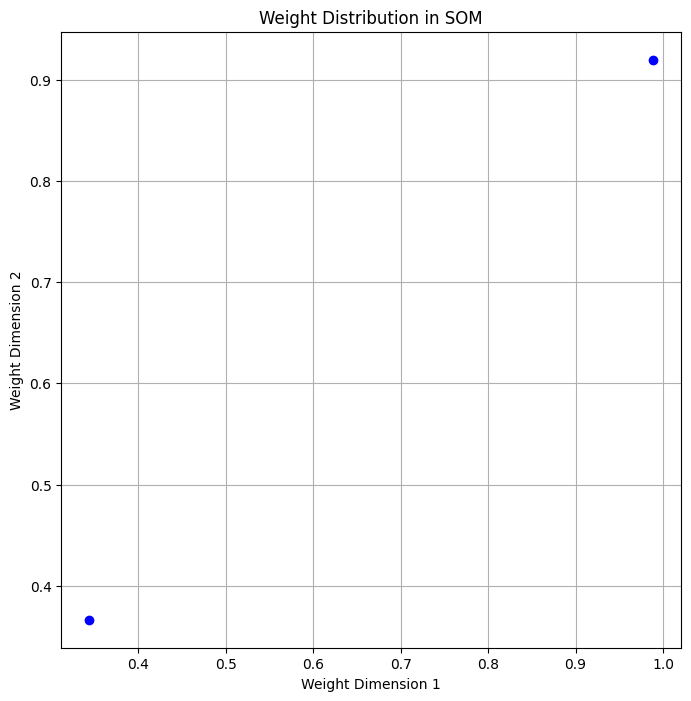

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter([w[i][0] for i in range(len(w))], [w[i][1] for i in range(len(w))], c='blue')
plt.xlabel("Weight Dimension 1")
plt.ylabel("Weight Dimension 2")
plt.title("Weight Distribution in SOM")
plt.grid()
plt.show()

IndexError: index 5656 is out of bounds for axis 0 with size 5656

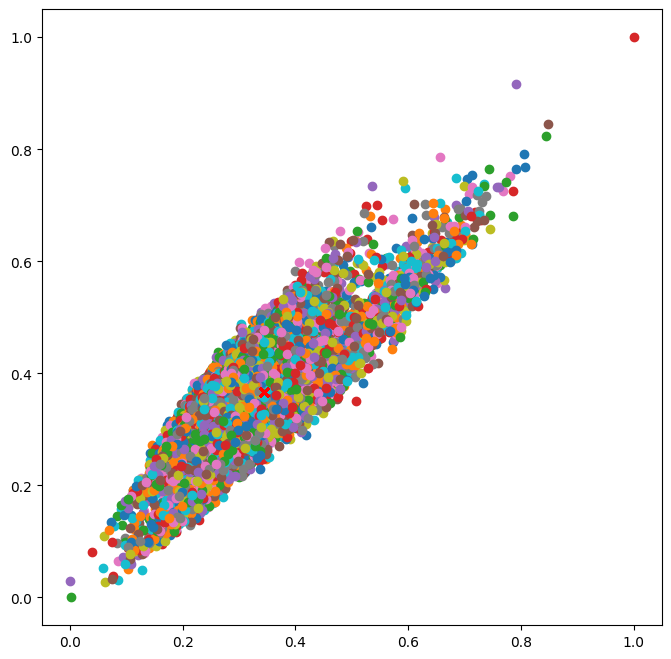

In [ ]:
plt.figure(figsize=(8, 8))
for idx, bmu in enumerate(bmu_indicies):
    plt.scatter(train[idx][0], train[idx][1], marker="o", label=f"BMU {bmu}" if idx == 0 else "")
    plt.scatter(w[bmu][0], w[bmu][1], marker="x", color="red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Points and Corresponding BMUs")
plt.legend(["Data Point", "BMU"])
plt.show()


In [ ]:
df.head()